# Load libraries

In [1]:
# import [package name] as [name abbr.]
# python 處理數字跟 tensor 運算的主要套件
import numpy as np
# google 的 NN coding 套件
import tensorflow as tf

# 有可能會出現警告，但是可以不用理他
# c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36:
# FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating`
# is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
# from ._conv import register_converters as _register_converters

c:\users\silver\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Load MNIST

In [2]:
mnist = tf.contrib.learn.datasets.load_dataset('mnist')

train_data = mnist.train.images # Returns np.array
print(train_data.shape)
# print(train_data[0,:])
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
print(train_labels.shape)
# print(train_labels[0])

test_data = mnist.test.images # Returns np.array
print(test_data.shape)
# print(test_data[0,:])
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)
print(test_labels.shape)
# print(test_labels[0])

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000,)
(10000, 784)
(10000,)


#  Define Model the Structure (Basic)

In [3]:
# # Define Model Input (x) and Output (y_),  y_ = f(x)
# x = tf.placeholder(tf.float32, [None, 784])
# y_ = tf.placeholder(tf.int32, [None])
# y_one = tf.one_hot(y_,10)

# # Define Model parameters
# w1 = tf.get_variable('w1',shape=[784, 512], initializer=tf.glorot_uniform_initializer())
# b1 = tf.get_variable('b1',shape=[512], initializer=tf.zeros_initializer)


# w2 = tf.get_variable('w2',shape=[512, 10], initializer=tf.glorot_uniform_initializer())
# b2 = tf.get_variable('b2',shape=[10], initializer=tf.zeros_initializer)

# h1 = tf.matmul(x, w1) + b1
# h1_relu = tf.nn.relu(h1)
# y = tf.matmul(h1_relu, w2) + b2

#  Define Model Structure (tf.leyers)

In [4]:
# Define Model Input (x) and Output (y_),  y_ = f(x)
x = tf.placeholder(tf.float32, [None, 784])
y_ = tf.placeholder(tf.int32, [None])
y_one = tf.one_hot(y_,10)
h1 = tf.layers.dense(x,512,activation=None)
h1_relu = tf.nn.relu(h1)
y = tf.layers.dense(h1_relu,10,activation=None)

In [5]:
# Define the Model Loss (4)
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one, logits=y))

# Define the Optimizer (5)
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

y_pred = tf.argmax(tf.nn.softmax(y), 1, output_type=tf.int32)

# Accuracy of the Model
correct_prediction = tf.equal(y_pred, y_)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# initialize the model
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Training & Evaluation

In [6]:
# Train Model for 1000 steps
hist_train_acc = []
hist_valid_acc = []
for step in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(128)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if (step % 100 == 0):
        acc_train = sess.run(accuracy, feed_dict={x: train_data, y_: train_labels})
        acc_valid = sess.run(accuracy, feed_dict={x: test_data, y_: test_labels})
        hist_train_acc.append(acc_train)
        hist_valid_acc.append(acc_valid)
        print("Accuracy: [T] %.4f / [V] %.4f" % (acc_train,acc_valid))

print(sess.run(y_pred, feed_dict={x: test_data,y_: test_labels}))

Accuracy: [T] 0.4029 / [V] 0.4008
Accuracy: [T] 0.9134 / [V] 0.9171
Accuracy: [T] 0.9358 / [V] 0.9375
Accuracy: [T] 0.9487 / [V] 0.9471
Accuracy: [T] 0.9607 / [V] 0.9594
Accuracy: [T] 0.9635 / [V] 0.9597
Accuracy: [T] 0.9665 / [V] 0.9622
Accuracy: [T] 0.9698 / [V] 0.9648
Accuracy: [T] 0.9767 / [V] 0.9702
Accuracy: [T] 0.9767 / [V] 0.9712
[7 2 1 ... 4 5 6]


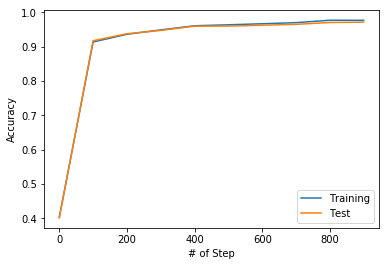

In [7]:
import matplotlib.pyplot as plt
x = [x*100 for x in range(len(hist_train_acc))]
line_train, = plt.plot(x, hist_train_acc, label='Training')
line_test, = plt.plot(x, hist_valid_acc, label='Test')
plt.xlabel('# of Step')
plt.ylabel('Accuracy')
plt.legend(handles=[line_train,line_test], loc=4)
plt.show()